# Hepatitis C Virus Classification

## Data wrangling, Standardization, Outliers, Discretization

In [75]:
from utils import *


# File path of dataset
filePath = 'hcvdat0.csv'

dataframe = pd.read_csv(filepath_or_buffer=filePath)

dataframe = dataframe.dropna()

scale_mapper = {
    "0=Blood Donor": 0,
    "0s=suspect Blood Donor": 2,
    "1=Hepatitis": 1,
    "2=Fibrosis": 1,
    "3=Cirrhosis": 1}

# Deviding blood types in two types
dataframe['Category'] = dataframe['Category'].replace(scale_mapper)
dataframe['Sex'] = dataframe['Category'].replace({"m":0, "f":1})
dataframe = dataframe[dataframe['Category'] != 2]

columns_to_scale = ['Age', 'ALB', 'ALP', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])

outlier_detector = EllipticEnvelope(contamination=.009)

# Fit detector
outlier_detector.fit(dataframe[columns_to_scale])

# Predict outliers
outliers = outlier_detector.predict(dataframe[columns_to_scale])
outliers_indices = outliers == -1
dataframe = dataframe[~outliers_indices]

features, target = dataframe[['Age', 'ALB', 'ALP', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']], dataframe['Category']


c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-56.119086049842579 > -81.565720420674481). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn(
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-56.297173534659713 > -80.884435297389629). You may want to try with a higher value of support_fraction (current value: 0.512).
  warnings.warn(
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarni

## Dummy classifier and basic split

Basic train test split, dummy classifier
0.5
Precision: 0.14
Recall: 0.79
F1-score: 0.23

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.47      0.63       130
           1       0.14      0.79      0.23        14

    accuracy                           0.50       144
   macro avg       0.55      0.63      0.43       144
weighted avg       0.87      0.50      0.59       144



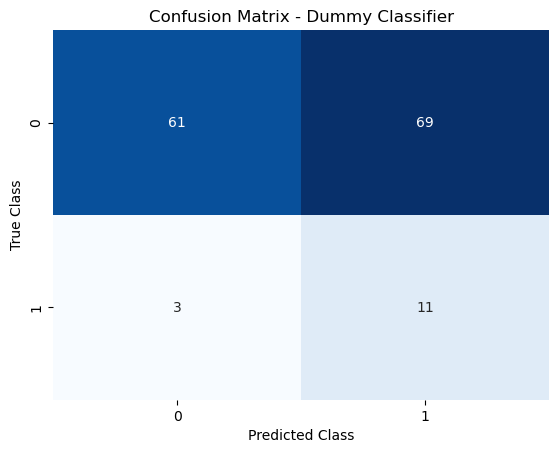

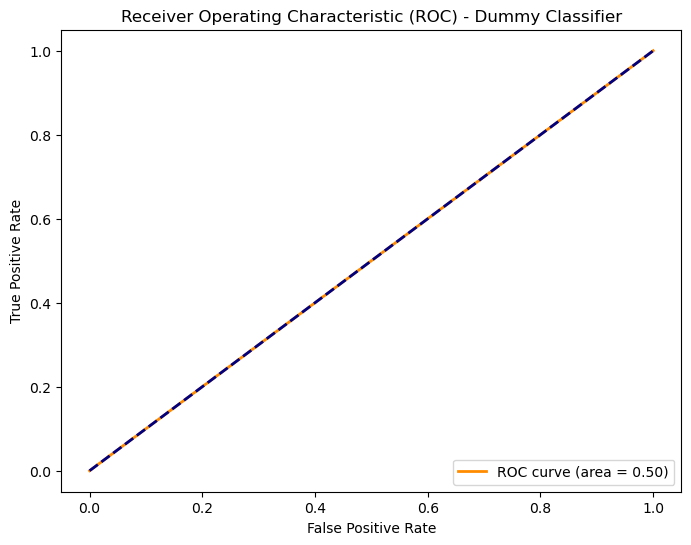

In [76]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)



# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Train" model
dummy.fit(features_train, target_train)
# Get accuracy score
print("Basic train test split, dummy classifier")
print(dummy.score(features_test, target_test))

dummy_pred = dummy.predict(features_test)
conf_matrix = confusion_matrix(target_test, dummy_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(target_test, dummy_pred, average='binary')
recall = recall_score(target_test, dummy_pred, average='binary')
f1 = f1_score(target_test, dummy_pred, average='binary')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

# Print classification report
print("\nClassification Report:")
print(classification_report(target_test, dummy_pred))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Dummy Classifier')
plt.show()

# Visualize the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(target_test, dummy.predict_proba(features_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Dummy Classifier')
plt.legend(loc='lower right')
plt.show()

dummy_score = dummy.score(features_test, target_test)

## RandomForestClassifier, Basic split


Basic split Train Test Split Random Forest Classifier Accuracy: 0.9861111111111112
Basic split Random Forest Classifier Precision: 1.00
Basic split Random Forest Classifier Recall: 0.86
Basic split Random Forest Classifier F1-score: 0.92

Basic split Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.86      0.92        14

    accuracy                           0.99       144
   macro avg       0.99      0.93      0.96       144
weighted avg       0.99      0.99      0.99       144



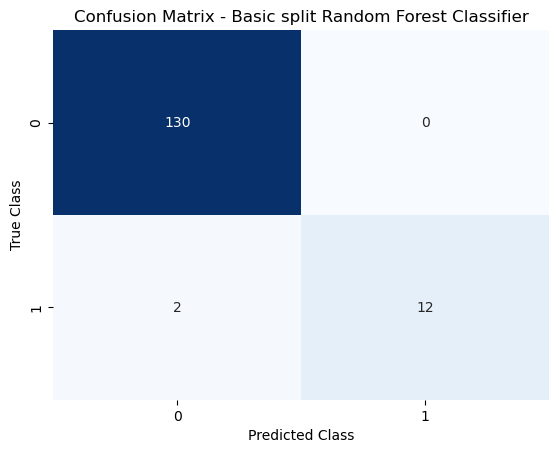

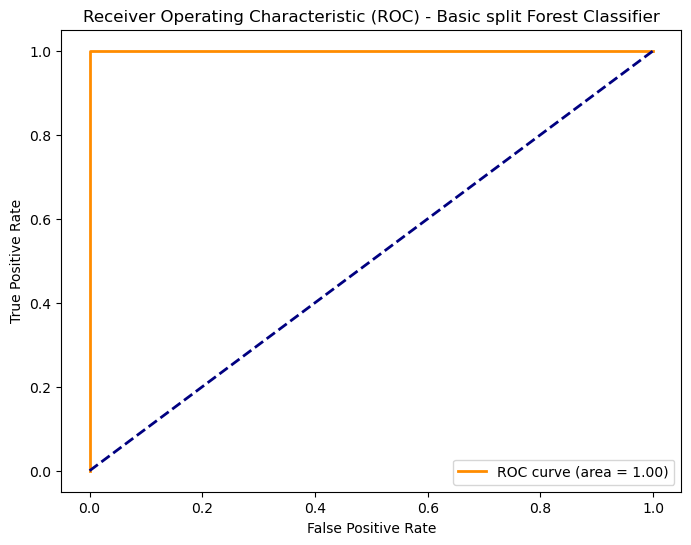

In [77]:

# Create classifier
rf_classifier = RandomForestClassifier()

# Create standardizer
standardizer = StandardScaler()

# Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline_rf = make_pipeline(standardizer, rf_classifier)

# Train model
pipeline_rf.fit(features_train, target_train)

# Get accuracy score on the test set
rf_accuracy = pipeline_rf.score(features_test, target_test)
print("Basic split Train Test Split Random Forest Classifier Accuracy:", rf_accuracy)

# Calculate precision, recall, and F1-score
rf_pred = pipeline_rf.predict(features_test)
rf_precision = precision_score(target_test, rf_pred, average='binary')
rf_recall = recall_score(target_test, rf_pred, average='binary')
rf_f1 = f1_score(target_test, rf_pred, average='binary')

print("Basic split Random Forest Classifier Precision: {:.2f}".format(rf_precision))
print("Basic split Random Forest Classifier Recall: {:.2f}".format(rf_recall))
print("Basic split Random Forest Classifier F1-score: {:.2f}".format(rf_f1))

# Print classification report
print("\nBasic split Random Forest Classifier Classification Report:")
print(classification_report(target_test, rf_pred))

# Visualize the confusion matrix
conf_matrix_rf_alt = confusion_matrix(target_test, rf_pred)
sns.heatmap(conf_matrix_rf_alt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Random Forest Classifier')
plt.show()

# Visualize the ROC curve
fpr_rf_alt, tpr_rf_alt, _ = roc_curve(target_test, pipeline_rf.predict_proba(features_test)[:, 1])
roc_auc_rf_alt = auc(fpr_rf_alt, tpr_rf_alt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_alt, tpr_rf_alt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf_alt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Forest Classifier')
plt.legend(loc='lower right')
plt.show()

rf_bs_score = rf_accuracy

## RandomForestClassifier, Cross-Validation

RandomForestClassifier Cross-Validation Accuracy: 0.9861161524500908
RandomForestClassifier Cross-Validation Precision: 0.9130434782608695
RandomForestClassifier Cross-Validation Recall: 0.86
RandomForestClassifier Cross-Validation F1-score: 0.8842105263157894
Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       526
           1       0.94      0.88      0.91        50

    accuracy                           0.98       576
   macro avg       0.96      0.94      0.95       576
weighted avg       0.98      0.98      0.98       576



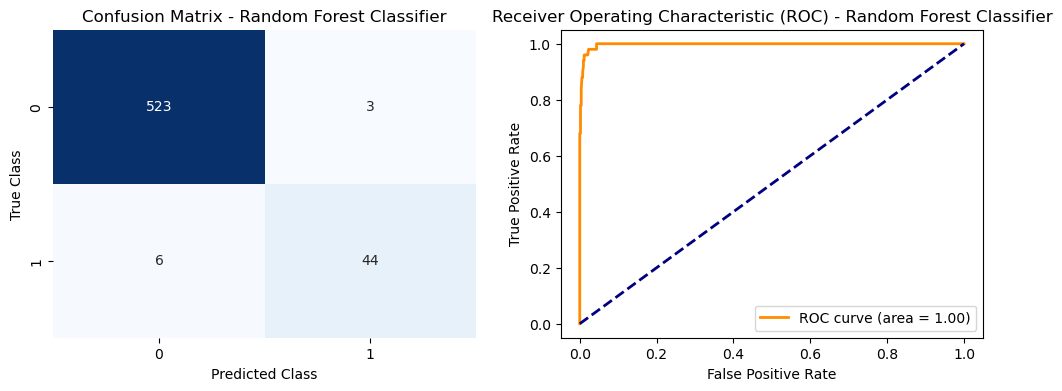

In [78]:
# Create standardizer
standardizer_cv = StandardScaler()
from sklearn.calibration import cross_val_predict

# Create Random Forest Classifier object
rf_classifier_cv = RandomForestClassifier()

# Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline_rf_cv = make_pipeline(standardizer_cv, rf_classifier_cv)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
skf_rfc_cv_results = cross_val_score(
    pipeline_rf_cv, # Pipeline
    features, # Feature matrix
    target, # Target vector
    cv=skf, # Cross-validation technique
    scoring="accuracy", # Loss function
    n_jobs=-1) # Use all CPU scores

# Calculate aggregated statistics directly from cross_val_score results
cv_accuracy_total_direct = np.mean(skf_rfc_cv_results)
cv_precision_total_direct = precision_score(target, cross_val_predict(pipeline_rf_cv, features, target, cv=skf), average='binary')
cv_recall_total_direct = recall_score(target, cross_val_predict(pipeline_rf_cv, features, target, cv=skf), average='binary')
cv_f1_total_direct = f1_score(target, cross_val_predict(pipeline_rf_cv, features, target, cv=skf), average='binary')


# Confusion matrix and ROC based on cross_val_score results
cv_pred_direct = cross_val_predict(pipeline_rf_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold = 0.5
cv_pred_binary = (cv_pred_direct > threshold).astype(int)

# Confusion matrix
cv_conf_matrix_direct = confusion_matrix(target, cv_pred_binary)

# ROC curve
fpr_direct, tpr_direct, _ = roc_curve(target, cv_pred_direct)
roc_auc_direct = auc(fpr_direct, tpr_direct)

# Classification report
cv_classification_report = classification_report(target, cv_pred_binary)

# Print aggregated statistics
print("RandomForestClassifier Cross-Validation Accuracy:", cv_accuracy_total_direct)
print("RandomForestClassifier Cross-Validation Precision:", cv_precision_total_direct)
print("RandomForestClassifier Cross-Validation Recall:", cv_recall_total_direct)
print("RandomForestClassifier Cross-Validation F1-score:", cv_f1_total_direct)

# Print classification report
print("Classification Report - Random Forest Classifier:")
print(cv_classification_report)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Random Forest Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_direct, tpr_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest Classifier')
plt.legend(loc='lower right')

plt.show()

rf_cv_score = cv_accuracy_total_direct


## Naive Bayes, Basic split

Basic split Train Test Split Random Forest Classifier Accuracy: 0.9861111111111112
Basic split Naive Bayes Classifier Precision: 0.71
Basic split Naive Bayes Classifier Recall: 0.71
Basic split Naive Bayes Classifier F1-score: 0.71

Basic split Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       130
           1       0.71      0.71      0.71        14

    accuracy                           0.94       144
   macro avg       0.84      0.84      0.84       144
weighted avg       0.94      0.94      0.94       144



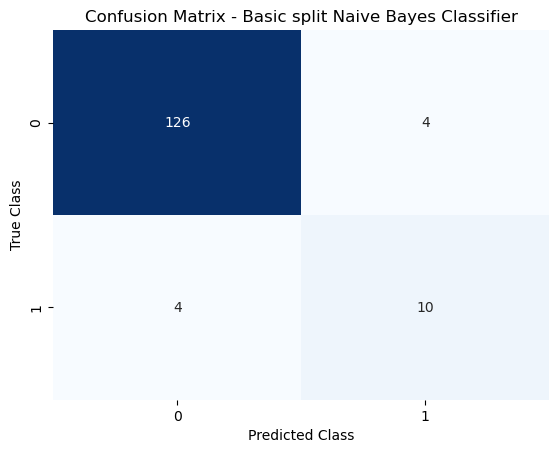

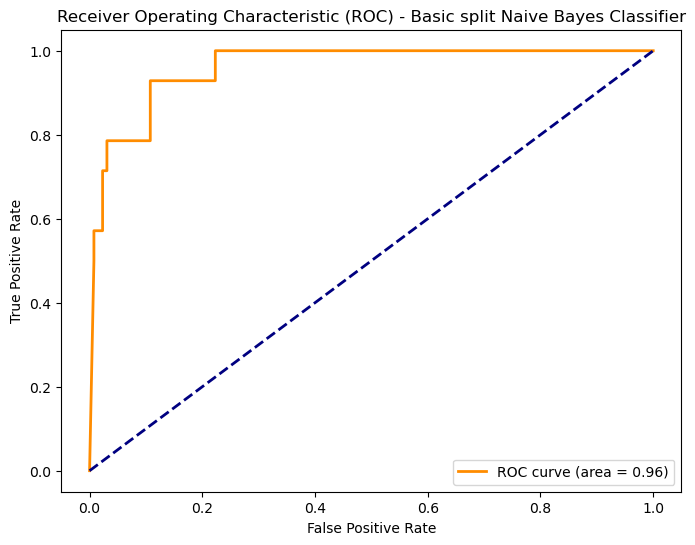

In [79]:
nb_classifier_basicSplit = GaussianNB()
# Train model

# Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline_nb = make_pipeline(standardizer, nb_classifier_basicSplit)

# Train model
pipeline_nb.fit(features_train, target_train)

# Get accuracy score on the test set
nb_accuracy = pipeline_nb.score(features_test, target_test)
print("Basic split Train Test Split Random Forest Classifier Accuracy:", rf_accuracy)

# Calculate precision, recall, and F1-score
nb_pred = pipeline_nb.predict(features_test)
nb_precision = precision_score(target_test, nb_pred, average='binary')
nb_recall = recall_score(target_test, nb_pred, average='binary')
nb_f1 = f1_score(target_test, nb_pred, average='binary')

print("Basic split Naive Bayes Classifier Precision: {:.2f}".format(nb_precision))
print("Basic split Naive Bayes Classifier Recall: {:.2f}".format(nb_recall))
print("Basic split Naive Bayes Classifier F1-score: {:.2f}".format(nb_f1))

# Print classification report
print("\nBasic split Naive Bayes Classifier Classification Report:")
print(classification_report(target_test, nb_pred))

# Visualize the confusion matrix
conf_matrix_nb_alt = confusion_matrix(target_test, nb_pred)
sns.heatmap(conf_matrix_nb_alt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Naive Bayes Classifier')
plt.show()

# Visualize the ROC curve
fpr_nb_alt, tpr_nb_alt, _ = roc_curve(target_test, pipeline_nb.predict_proba(features_test)[:, 1])
roc_auc_nb_alt = auc(fpr_nb_alt, tpr_nb_alt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_alt, tpr_nb_alt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb_alt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

nb_bs_score = nb_accuracy

## Naive Bayes, Cross-Validation


Naive Bayes Cross-Validation Accuracy: 0.941016333938294
Naive Bayes Cross-Validation Precision: 0.6538461538461539
Naive Bayes Cross-Validation Recall: 0.68
Naive Bayes Cross-Validation F1-score: 0.6666666666666666
Classification Report - Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       526
           1       0.65      0.68      0.67        50

    accuracy                           0.94       576
   macro avg       0.81      0.82      0.82       576
weighted avg       0.94      0.94      0.94       576



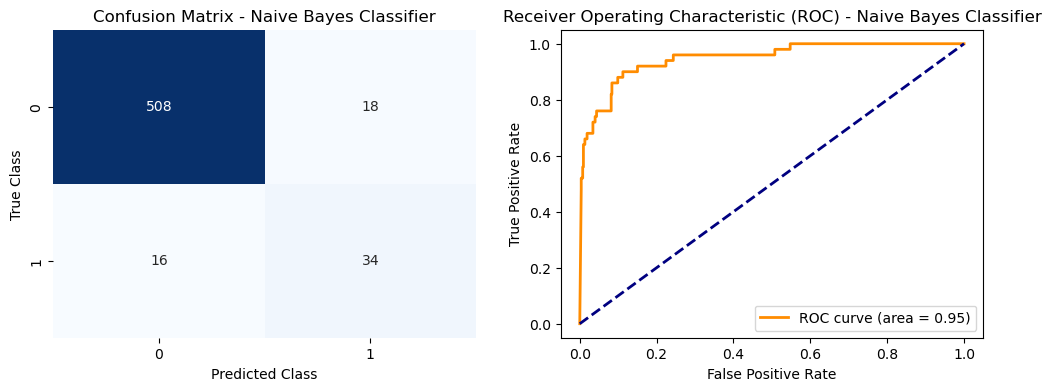

In [80]:
# Create standardizer
standardizer_cv = StandardScaler()
from sklearn.calibration import cross_val_predict

# Create Random Forest Classifier object
nb_classifier_cv = GaussianNB()

# Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline_nb_cv = make_pipeline(standardizer_cv, nb_classifier_cv)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
skf_nbc_cv_results = cross_val_score(
    pipeline_nb_cv, # Pipeline
    features, # Feature matrix
    target, # Target vector
    cv=skf, # Cross-validation technique
    scoring="accuracy", # Loss function
    n_jobs=-1) # Use all CPU scores

# Calculate aggregated statistics directly from cross_val_score results
cv_accuracy_total_direct = np.mean(skf_nbc_cv_results)
cv_precision_total_direct = precision_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')
cv_recall_total_direct = recall_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')
cv_f1_total_direct = f1_score(target, cross_val_predict(pipeline_nb_cv, features, target, cv=skf), average='binary')


# Confusion matrix and ROC based on cross_val_score results
cv_pred_direct = cross_val_predict(pipeline_nb_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold = 0.5
cv_pred_binary = (cv_pred_direct > threshold).astype(int)

# Confusion matrix
cv_conf_matrix_direct = confusion_matrix(target, cv_pred_binary)

# ROC curve
fpr_direct, tpr_direct, _ = roc_curve(target, cv_pred_direct)
roc_auc_direct = auc(fpr_direct, tpr_direct)

# Classification report
cv_classification_report = classification_report(target, cv_pred_binary)

# Print aggregated statistics
print("Naive Bayes Cross-Validation Accuracy:", cv_accuracy_total_direct)
print("Naive Bayes Cross-Validation Precision:", cv_precision_total_direct)
print("Naive Bayes Cross-Validation Recall:", cv_recall_total_direct)
print("Naive Bayes Cross-Validation F1-score:", cv_f1_total_direct)

# Print classification report
print("Classification Report - Naive Bayes Classifier:")
print(cv_classification_report)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Naive Bayes Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_direct, tpr_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes Classifier')
plt.legend(loc='lower right')

plt.show()

nb_cv_score = cv_accuracy_total_direct

## K-Nearest Neighbors, Basic split

Basic split Train Test Split k-Nearest Neighbors Classifier Accuracy: 0.9513888888888888
Basic split k-Nearest Neighbors Classifier Precision: 1.00
Basic split k-Nearest Neighbors Classifier Recall: 0.50
Basic split k-Nearest Neighbors Classifier F1-score: 0.67

Basic split k-Nearest Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       130
           1       1.00      0.50      0.67        14

    accuracy                           0.95       144
   macro avg       0.97      0.75      0.82       144
weighted avg       0.95      0.95      0.94       144



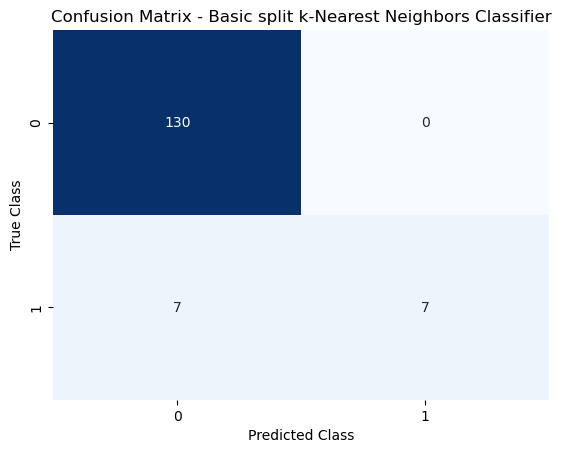

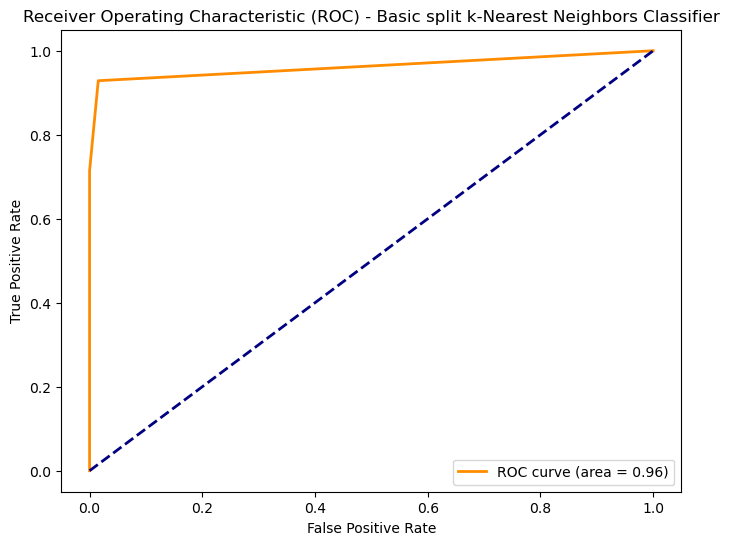

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Create K-Nearest Neighbors classifier object
knn_classifier_basic_split = KNeighborsClassifier()

# Create a pipeline that standardizes, then runs KNN
pipeline_knn = make_pipeline(standardizer, knn_classifier_basic_split)

# Train model
pipeline_knn.fit(features_train, target_train)

# Get accuracy score on the test set
knn_accuracy = pipeline_knn.score(features_test, target_test)
print("Basic split Train Test Split k-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

# Calculate precision, recall, and F1-score
knn_pred = pipeline_knn.predict(features_test)
knn_precision = precision_score(target_test, knn_pred, average='binary')
knn_recall = recall_score(target_test, knn_pred, average='binary')
knn_f1 = f1_score(target_test, knn_pred, average='binary')

print("Basic split k-Nearest Neighbors Classifier Precision: {:.2f}".format(knn_precision))
print("Basic split k-Nearest Neighbors Classifier Recall: {:.2f}".format(knn_recall))
print("Basic split k-Nearest Neighbors Classifier F1-score: {:.2f}".format(knn_f1))

# Print classification report
print("\nBasic split k-Nearest Neighbors Classifier Classification Report:")
print(classification_report(target_test, knn_pred))

# Visualize the confusion matrix
conf_matrix_knn_alt = confusion_matrix(target_test, knn_pred)
sns.heatmap(conf_matrix_knn_alt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split k-Nearest Neighbors Classifier')
plt.show()

# Visualize the ROC curve
fpr_knn_alt, tpr_knn_alt, _ = roc_curve(target_test, pipeline_knn.predict_proba(features_test)[:, 1])
roc_auc_knn_alt = auc(fpr_knn_alt, tpr_knn_alt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_alt, tpr_knn_alt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn_alt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split k-Nearest Neighbors Classifier')
plt.legend(loc='lower right')
plt.show()

knn_bs_score = knn_accuracy

## K-Nearest Neighbors, Cross-Validation

k-Nearest Neighbors Cross-Validation Accuracy: 0.9601330913490622
k-Nearest Neighbors Cross-Validation Precision: 0.9655172413793104
k-Nearest Neighbors Cross-Validation Recall: 0.56
k-Nearest Neighbors Cross-Validation F1-score: 0.7088607594936709
Classification Report - k-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       526
           1       0.97      0.56      0.71        50

    accuracy                           0.96       576
   macro avg       0.96      0.78      0.84       576
weighted avg       0.96      0.96      0.96       576



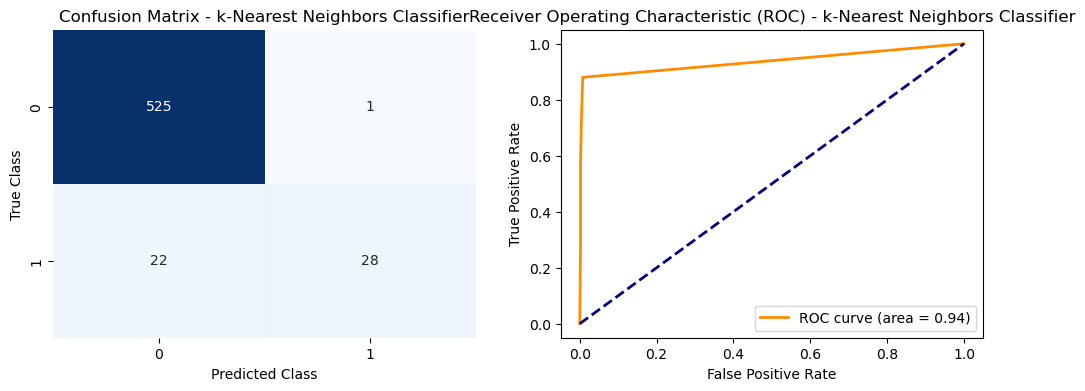

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Create K-Nearest Neighbors classifier object
knn_classifier_cv = KNeighborsClassifier()

# Create a pipeline that standardizes, then runs KNN
pipeline_knn_cv = make_pipeline(standardizer_cv, knn_classifier_cv)

# Conduct k-fold cross-validation
skf_knn_cv_results = cross_val_score(
    pipeline_knn_cv,  # Pipeline
    features,          # Feature matrix
    target,            # Target vector
    cv=skf,            # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1          # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
cv_accuracy_knn_direct = np.mean(skf_knn_cv_results)
cv_precision_knn_direct = precision_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')
cv_recall_knn_direct = recall_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')
cv_f1_knn_direct = f1_score(target, cross_val_predict(pipeline_knn_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_knn_direct = cross_val_predict(pipeline_knn_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_knn = 0.5
cv_pred_binary_knn = (cv_pred_knn_direct > threshold_knn).astype(int)

# Confusion matrix
cv_conf_matrix_knn_direct = confusion_matrix(target, cv_pred_binary_knn)

# ROC curve
fpr_knn_direct, tpr_knn_direct, _ = roc_curve(target, cv_pred_knn_direct)
roc_auc_knn_direct = auc(fpr_knn_direct, tpr_knn_direct)

# Classification report
cv_classification_report_knn = classification_report(target, cv_pred_binary_knn)

# Print aggregated statistics
print("k-Nearest Neighbors Cross-Validation Accuracy:", cv_accuracy_knn_direct)
print("k-Nearest Neighbors Cross-Validation Precision:", cv_precision_knn_direct)
print("k-Nearest Neighbors Cross-Validation Recall:", cv_recall_knn_direct)
print("k-Nearest Neighbors Cross-Validation F1-score:", cv_f1_knn_direct)

# Print classification report
print("Classification Report - k-Nearest Neighbors Classifier:")
print(cv_classification_report_knn)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_knn_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - k-Nearest Neighbors Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_knn_direct, tpr_knn_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - k-Nearest Neighbors Classifier')
plt.legend(loc='lower right')

plt.show()

knn_cv_score = cv_accuracy_knn_direct

## Gradient Boosting, Basic split

Basic split Train Test Split Gradient Boosting Classifier Accuracy: 0.9861111111111112
Basic split Gradient Boosting Classifier Precision: 1.00
Basic split Gradient Boosting Classifier Recall: 0.86
Basic split Gradient Boosting Classifier F1-score: 0.92

Basic split Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.86      0.92        14

    accuracy                           0.99       144
   macro avg       0.99      0.93      0.96       144
weighted avg       0.99      0.99      0.99       144



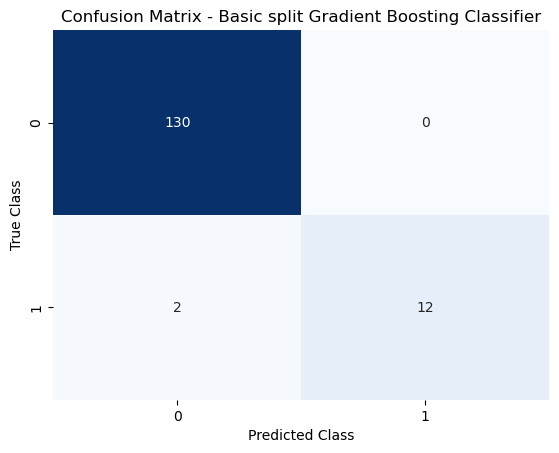

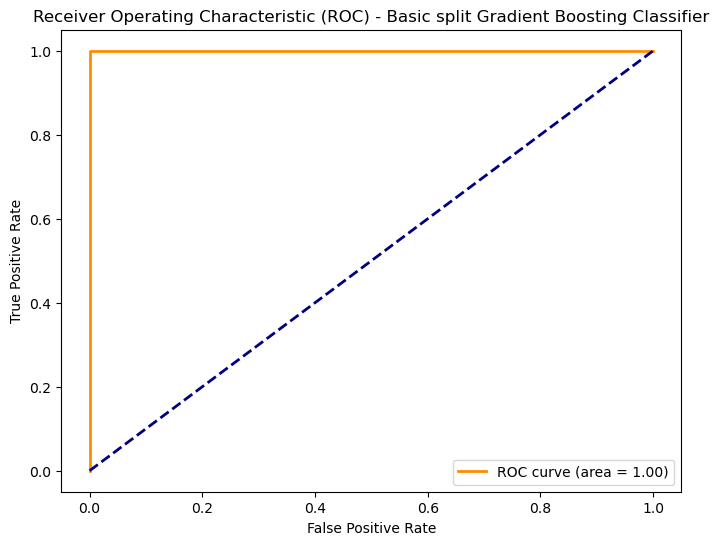

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier object
gb_classifier_basic_split = GradientBoostingClassifier()

# Create a pipeline that standardizes, then runs Gradient Boosting
pipeline_gb_basic_split = make_pipeline(standardizer, gb_classifier_basic_split)

# Train model
pipeline_gb_basic_split.fit(features_train, target_train)

# Get accuracy score on the test set
gb_accuracy_basic_split = pipeline_gb_basic_split.score(features_test, target_test)
print("Basic split Train Test Split Gradient Boosting Classifier Accuracy:", gb_accuracy_basic_split)

# Calculate precision, recall, and F1-score
gb_pred_basic_split = pipeline_gb_basic_split.predict(features_test)
gb_precision_basic_split = precision_score(target_test, gb_pred_basic_split, average='binary')
gb_recall_basic_split = recall_score(target_test, gb_pred_basic_split, average='binary')
gb_f1_basic_split = f1_score(target_test, gb_pred_basic_split, average='binary')

print("Basic split Gradient Boosting Classifier Precision: {:.2f}".format(gb_precision_basic_split))
print("Basic split Gradient Boosting Classifier Recall: {:.2f}".format(gb_recall_basic_split))
print("Basic split Gradient Boosting Classifier F1-score: {:.2f}".format(gb_f1_basic_split))

# Print classification report
print("\nBasic split Gradient Boosting Classifier Classification Report:")
print(classification_report(target_test, gb_pred_basic_split))

# Visualize confusion matrix
conf_matrix_gb_basic_split = confusion_matrix(target_test, gb_pred_basic_split)
sns.heatmap(conf_matrix_gb_basic_split, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Gradient Boosting Classifier')
plt.show()

# Visualize the ROC curve
fpr_gb_basic_split, tpr_gb_basic_split, _ = roc_curve(target_test, pipeline_gb_basic_split.predict_proba(features_test)[:, 1])
roc_auc_gb_basic_split = auc(fpr_gb_basic_split, tpr_gb_basic_split)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_basic_split, tpr_gb_basic_split, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gb_basic_split))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

gb_bs_score = gb_accuracy_basic_split

## Gradient Boosting, Cross-Validation

Gradient Boosting Cross-Validation Accuracy: 0.9843617664851785
Gradient Boosting Cross-Validation Precision: 0.9361702127659575
Gradient Boosting Cross-Validation Recall: 0.88
Gradient Boosting Cross-Validation F1-score: 0.9072164948453608
Classification Report - Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       526
           1       0.94      0.88      0.91        50

    accuracy                           0.98       576
   macro avg       0.96      0.94      0.95       576
weighted avg       0.98      0.98      0.98       576



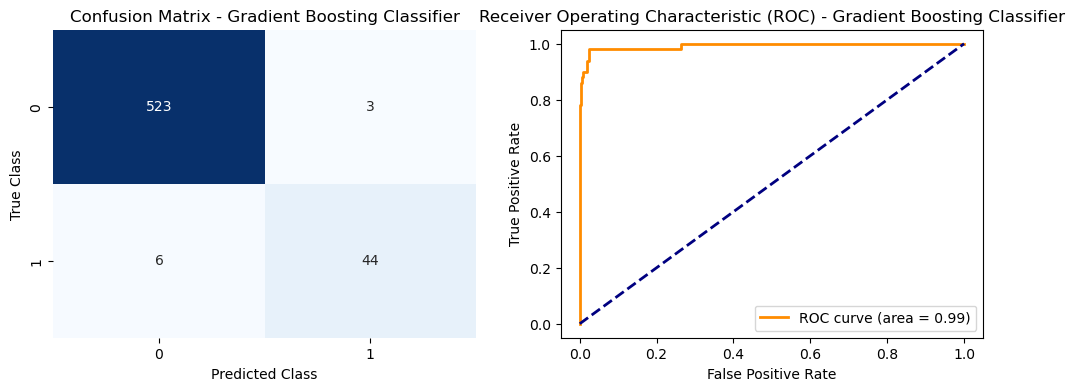

In [84]:
# Create Gradient Boosting classifier object
gb_classifier_cv = GradientBoostingClassifier()

# Create a pipeline that standardizes, then runs Gradient Boosting
pipeline_gb_cv = make_pipeline(standardizer_cv, gb_classifier_cv)

# Conduct k-fold cross-validation
skf_gb_cv_results = cross_val_score(
    pipeline_gb_cv,  # Pipeline
    features,        # Feature matrix
    target,          # Target vector
    cv=skf,          # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1        # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
cv_accuracy_gb_direct = np.mean(skf_gb_cv_results)
cv_precision_gb_direct = precision_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')
cv_recall_gb_direct = recall_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')
cv_f1_gb_direct = f1_score(target, cross_val_predict(pipeline_gb_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_gb_direct = cross_val_predict(pipeline_gb_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_gb = 0.5
cv_pred_binary_gb = (cv_pred_gb_direct > threshold_gb).astype(int)

# Confusion matrix
cv_conf_matrix_gb_direct = confusion_matrix(target, cv_pred_binary_gb)

# ROC curve
fpr_gb_direct, tpr_gb_direct, _ = roc_curve(target, cv_pred_gb_direct)
roc_auc_gb_direct = auc(fpr_gb_direct, tpr_gb_direct)

# Classification report
cv_classification_report_gb = classification_report(target, cv_pred_binary_gb)

# Print aggregated statistics
print("Gradient Boosting Cross-Validation Accuracy:", cv_accuracy_gb_direct)
print("Gradient Boosting Cross-Validation Precision:", cv_precision_gb_direct)
print("Gradient Boosting Cross-Validation Recall:", cv_recall_gb_direct)
print("Gradient Boosting Cross-Validation F1-score:", cv_f1_gb_direct)

# Print classification report
print("Classification Report - Gradient Boosting Classifier:")
print(cv_classification_report_gb)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_gb_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_gb_direct, tpr_gb_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gb_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc='lower right')

plt.show()

gb_cv_score = cv_accuracy_gb_direct

## Logistic Regression, Basic split

Basic split Train Test Split Logistic Regression Classifier Accuracy: 0.9861111111111112
Basic split Logistic Regression Classifier Precision: 1.00
Basic split Logistic Regression Classifier Recall: 0.86
Basic split Logistic Regression Classifier F1-score: 0.92

Basic split Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.86      0.92        14

    accuracy                           0.99       144
   macro avg       0.99      0.93      0.96       144
weighted avg       0.99      0.99      0.99       144



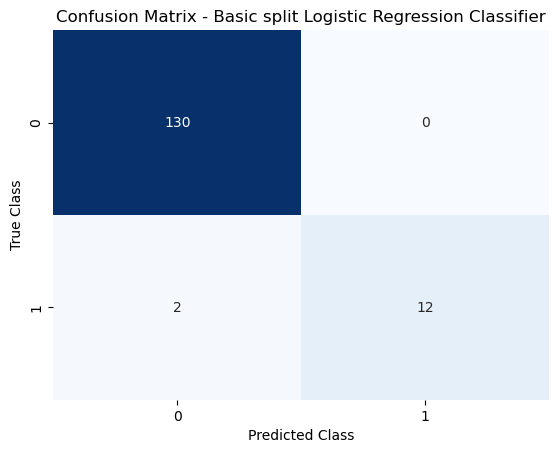

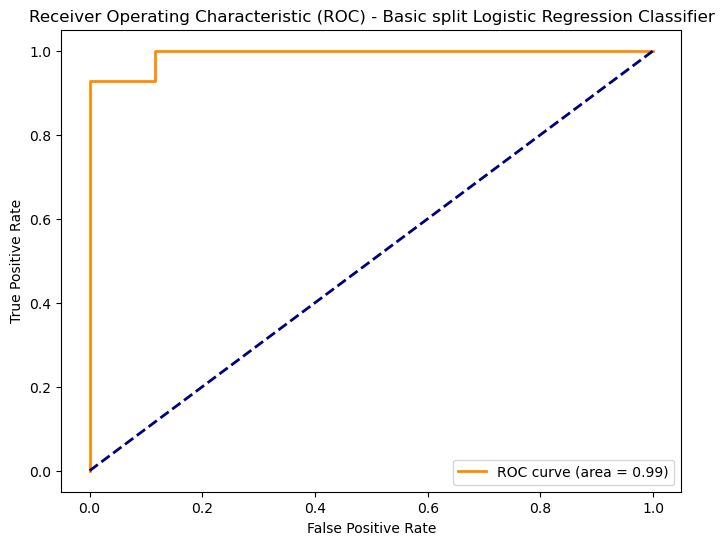

In [85]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression classifier object
log_reg_classifier_basic_split = LogisticRegression()

# Create a pipeline that standardizes, then runs Logistic Regression
pipeline_log_reg_basic_split = make_pipeline(standardizer, log_reg_classifier_basic_split)

# Train model
pipeline_log_reg_basic_split.fit(features_train, target_train)

# Get accuracy score on the test set
log_reg_accuracy_basic_split = pipeline_log_reg_basic_split.score(features_test, target_test)
print("Basic split Train Test Split Logistic Regression Classifier Accuracy:", log_reg_accuracy_basic_split)

# Calculate precision, recall, and F1-score
log_reg_pred_basic_split = pipeline_log_reg_basic_split.predict(features_test)
log_reg_precision_basic_split = precision_score(target_test, log_reg_pred_basic_split, average='binary')
log_reg_recall_basic_split = recall_score(target_test, log_reg_pred_basic_split, average='binary')
log_reg_f1_basic_split = f1_score(target_test, log_reg_pred_basic_split, average='binary')

print("Basic split Logistic Regression Classifier Precision: {:.2f}".format(log_reg_precision_basic_split))
print("Basic split Logistic Regression Classifier Recall: {:.2f}".format(log_reg_recall_basic_split))
print("Basic split Logistic Regression Classifier F1-score: {:.2f}".format(log_reg_f1_basic_split))

# Print classification report
print("\nBasic split Logistic Regression Classifier Classification Report:")
print(classification_report(target_test, log_reg_pred_basic_split))

# Visualize confusion matrix
conf_matrix_log_reg_basic_split = confusion_matrix(target_test, log_reg_pred_basic_split)
sns.heatmap(conf_matrix_log_reg_basic_split, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Basic split Logistic Regression Classifier')
plt.show()

# Visualize the ROC curve
fpr_log_reg_basic_split, tpr_log_reg_basic_split, _ = roc_curve(target_test, pipeline_log_reg_basic_split.predict_proba(features_test)[:, 1])
roc_auc_log_reg_basic_split = auc(fpr_log_reg_basic_split, tpr_log_reg_basic_split)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_basic_split, tpr_log_reg_basic_split, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log_reg_basic_split))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Basic split Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()

lg_bs_score = log_reg_accuracy_basic_split

## Logistic Regression, Cross-Validation

Logistic Regression Cross-Validation Accuracy: 0.9843315184513006
Logistic Regression Cross-Validation Precision: 0.9767441860465116
Logistic Regression Cross-Validation Recall: 0.84
Logistic Regression Cross-Validation F1-score: 0.9032258064516129
Classification Report - Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       526
           1       0.98      0.84      0.90        50

    accuracy                           0.98       576
   macro avg       0.98      0.92      0.95       576
weighted avg       0.98      0.98      0.98       576



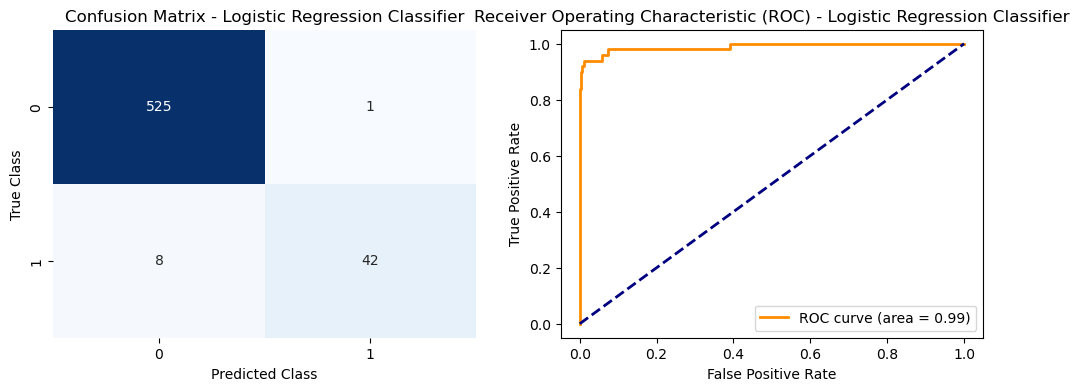

In [86]:
# Create Logistic Regression classifier object
log_reg_classifier_cv = LogisticRegression()

# Create a pipeline that standardizes, then runs Logistic Regression
pipeline_log_reg_cv = make_pipeline(standardizer_cv, log_reg_classifier_cv)

# Conduct k-fold cross-validation
skf_log_reg_cv_results = cross_val_score(
    pipeline_log_reg_cv,  # Pipeline
    features,            # Feature matrix
    target,              # Target vector
    cv=skf,              # Cross-validation technique
    scoring="accuracy",  # Loss function
    n_jobs=-1            # Use all CPU cores
)

# Calculate aggregated statistics directly from cross_val_score results
cv_accuracy_log_reg_direct = np.mean(skf_log_reg_cv_results)
cv_precision_log_reg_direct = precision_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')
cv_recall_log_reg_direct = recall_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')
cv_f1_log_reg_direct = f1_score(target, cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf), average='binary')

# Confusion matrix and ROC based on cross_val_score results
cv_pred_log_reg_direct = cross_val_predict(pipeline_log_reg_cv, features, target, cv=skf, method='predict_proba')[:, 1]

# Threshold for binary classification
threshold_log_reg = 0.5
cv_pred_binary_log_reg = (cv_pred_log_reg_direct > threshold_log_reg).astype(int)

# Confusion matrix
cv_conf_matrix_log_reg_direct = confusion_matrix(target, cv_pred_binary_log_reg)

# ROC curve
fpr_log_reg_direct, tpr_log_reg_direct, _ = roc_curve(target, cv_pred_log_reg_direct)
roc_auc_log_reg_direct = auc(fpr_log_reg_direct, tpr_log_reg_direct)

# Classification report
cv_classification_report_log_reg = classification_report(target, cv_pred_binary_log_reg)

# Print aggregated statistics
print("Logistic Regression Cross-Validation Accuracy:", cv_accuracy_log_reg_direct)
print("Logistic Regression Cross-Validation Precision:", cv_precision_log_reg_direct)
print("Logistic Regression Cross-Validation Recall:", cv_recall_log_reg_direct)
print("Logistic Regression Cross-Validation F1-score:", cv_f1_log_reg_direct)

# Print classification report
print("Classification Report - Logistic Regression Classifier:")
print(cv_classification_report_log_reg)

# Visualize confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cv_conf_matrix_log_reg_direct, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Logistic Regression Classifier')

# Visualize the ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_log_reg_direct, tpr_log_reg_direct, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log_reg_direct))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression Classifier')
plt.legend(loc='lower right')

plt.show()
lg_cv_score = cv_accuracy_log_reg_direct

# Results compared

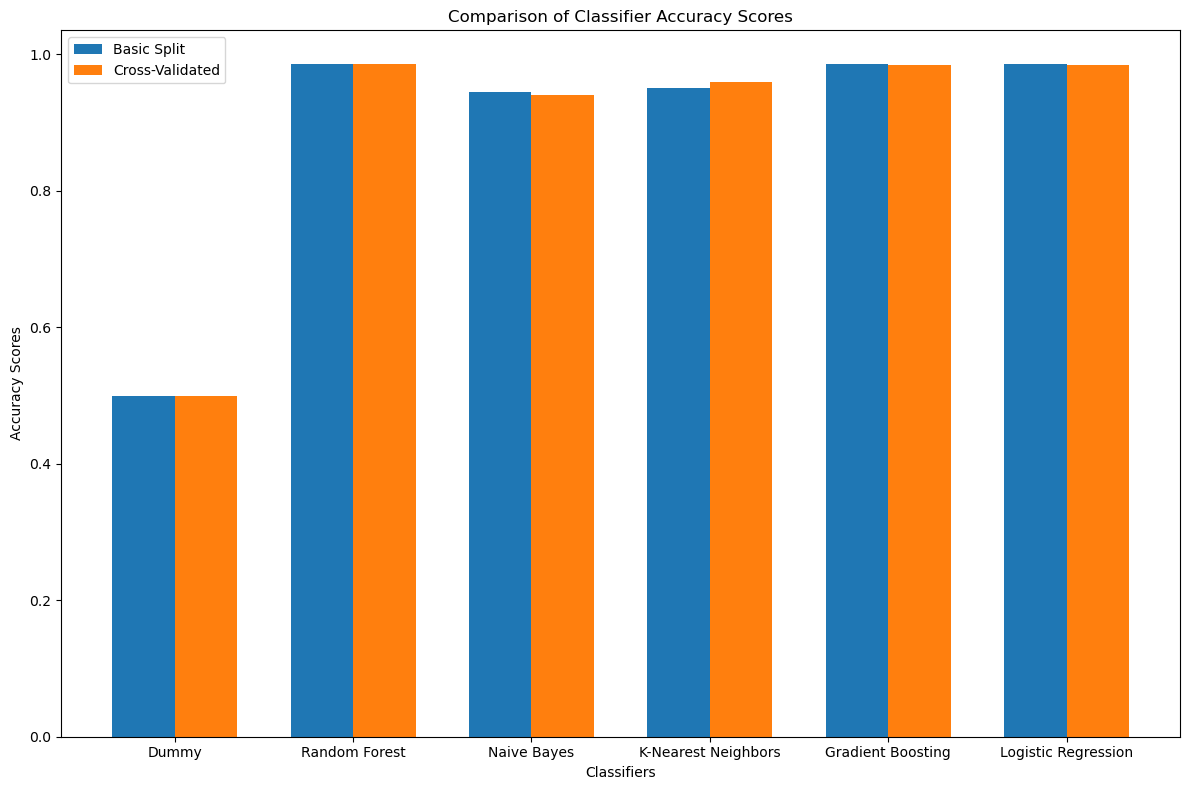

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classifiers
classifiers = ['Dummy', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors', 'Gradient Boosting', 'Logistic Regression']

# Define the accuracy scores for basic split and cross-validated scenarios
accuracy_basic_split = [dummy_score, rf_bs_score, nb_bs_score, knn_bs_score, gb_bs_score, lg_bs_score]
accuracy_cross_val = [dummy_score, rf_cv_score, nb_cv_score, knn_cv_score, gb_cv_score, lg_cv_score]

# Plotting
bar_width = 0.35
index = np.arange(len(classifiers))

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(index - bar_width/2, accuracy_basic_split, bar_width, label='Basic Split')
ax.bar(index + bar_width/2, accuracy_cross_val, bar_width, label='Cross-Validated')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy Scores')
ax.set_title('Comparison of Classifier Accuracy Scores')
ax.set_xticks(index)
ax.set_xticklabels(classifiers)
ax.legend()

plt.tight_layout()
plt.show()
